This is in progress, a bit of a mess at the moment.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot

from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

# Read matrix csvs into dataframes

In [2]:
# tfidf = pd.read_csv('./matrices/tfidf_' + year + '_' + grant_type + '.csv')
# cosine_sim = pd.read_csv('./matrices/cos_' + year + '_' + grant_type + '.csv')
# df_neuro = pd.read_csv('./matrices/neuro_df' + year + '_' + grant_type + '.csv')

# test 1985
tfidf = pd.read_csv('./matrices/tfidf_' + '2005' + '_' + 'R01' + '.csv')
cosine_sim = pd.read_csv('./matrices/cos_' + '2005' + '_' + 'R01' + '.csv', header=None)
df_neuro = pd.read_csv('./matrices/neuro_df' + '2005' + '_' + 'R01' + '.csv')

Clean dataframes

In [3]:
def clean_df(df):
    df.index = df['Unnamed: 0']
    df = df.iloc[:, 1:]
    return df

def clean_cos(df, df_neuro):
    df.index = df_neuro.index
    return df

In [4]:
tfidf = clean_df(tfidf)
df_neuro = clean_df(df_neuro)
cosine_sim = clean_cos(cosine_sim, df_neuro)

In [ ]:
def convert_datetime(pd_series):
    from datetime import datetime
    datetime_object = datetime.strptime(str(pd_series), '%m/%d/%Y')
    return datetime_object

def days(pd_series):
    from datetime import datetime
    return round(pd_series.days/365*12)

df_neuro['budget_months'] = (df_neuro.BUDGET_END.apply(convert_datetime)-df_neuro.BUDGET_START.apply(convert_datetime)).apply(days)


# Clustering projects by abstract
**Will try a few different methods:**
- *k*-means clustering
- Ward agglomerative clustering
- Affinity propagation

### *k*-means with n_cluster=100 number of clusters

In [58]:
def kmeans(tfidf, df_neuro, n_clusters=100):
    """
    input: 
        tfidf: dataframe
        df_neuro: dataframe
        n_clusters: int
    returns:
        df_neuro containing 'kmeans' column
    """
    from sklearn.cluster import KMeans
    
    # cluster with n_clusters number of clusters
    kmeans = KMeans(n_clusters)
    kmeans.fit(tfidf)
    
    # get cluster labels
    clusters = list(kmeans.labels_)
    
    # redo dataframe to contain clusters
    df_neuro['kmeans'] = clusters
    # print (df_neuro.kmeans.hist(bins = n_clusters))
    
    # get keywords of each cluster
#     order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1] 
#     terms = list(tfidf.columns)
#     for i in range(100):
#         print ('Cluster', i, ":")
#         for ind in order_centroids[i, :6]:
#             print ('%s' % terms[ind])
#         print ()
    
    return df_neuro

Axes(0.125,0.125;0.775x0.775)


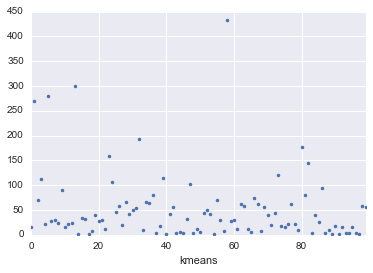

In [59]:
kmeans(tfidf_svd, df_neuro)

print (df_neuro.groupby('kmeans')['ABSTRACT_TEXT'].count().plot(ls='', marker='.'))

### Hierarchical agglomerative clustering (Ward)
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [95]:
def ward(dist):
    """
    """
    from scipy.cluster.hierarchy import ward, dendrogram
    
    linkage_matrix = ward(dist)
    
    
#     from scipy.cluster.hierarchy import cophenet
#     from scipy.spatial.distance import pdist
#     c, coph_dists = cophenet(linkage_matrix, pdist(dist))
#     print (c)

    
    
    
#     fig, ax = pyplot.subplots(figsize=(15, 25)) # set size
# #     ax = dendrogram(linkage_matrix, 100, truncate_mode='lastp', orientation="right");
# #     ax = dendrogram(linkage_matrix, orientation="right");

#     pyplot.tick_params(\
#         axis= 'x',          # changes apply to the x-axis
#         which='major',      # both major and minor ticks are affected
#         bottom='off',      # ticks along the bottom edge are off
#         top='off',         # ticks along the top edge are off
#         labelbottom='off')
#     pyplot.tick_params(axis='y', which='major', labelsize=10)

#     pyplot.tight_layout() #show plot with tight layout
    

#     plt.savefig('ward_clusters.png', dpi=200)   
    
    return linkage_matrix
def ward_plot(linkage_matrix):
    linkage_df = pd.DataFrame(linkage_matrix, columns=['idx1', 'idx2', 'distance', 'n_in_cluster'])
    linkage_df.distance.plot()

    
def flatten_clusters(df_neuro, linkage_matrix, threshold, criterion, matrix_type):
    """
    criterion: see https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
        ['inconsistent', 'distance', 'maxclust', 'monocrit', 'maxclust_monocrit']
    matrix_type: str, 'ward_cos' or 'ward_euc'
    threshold: float or int
    returns: cluster labels, ndarray
    """
    from scipy.cluster.hierarchy import fcluster
    df_neuro[matrix_type]= fcluster(linkage_matrix, threshold, criterion)
    
    return df_neuro

#### Let's first try Ward clustering using cosine similarity distance.

0.371069564702


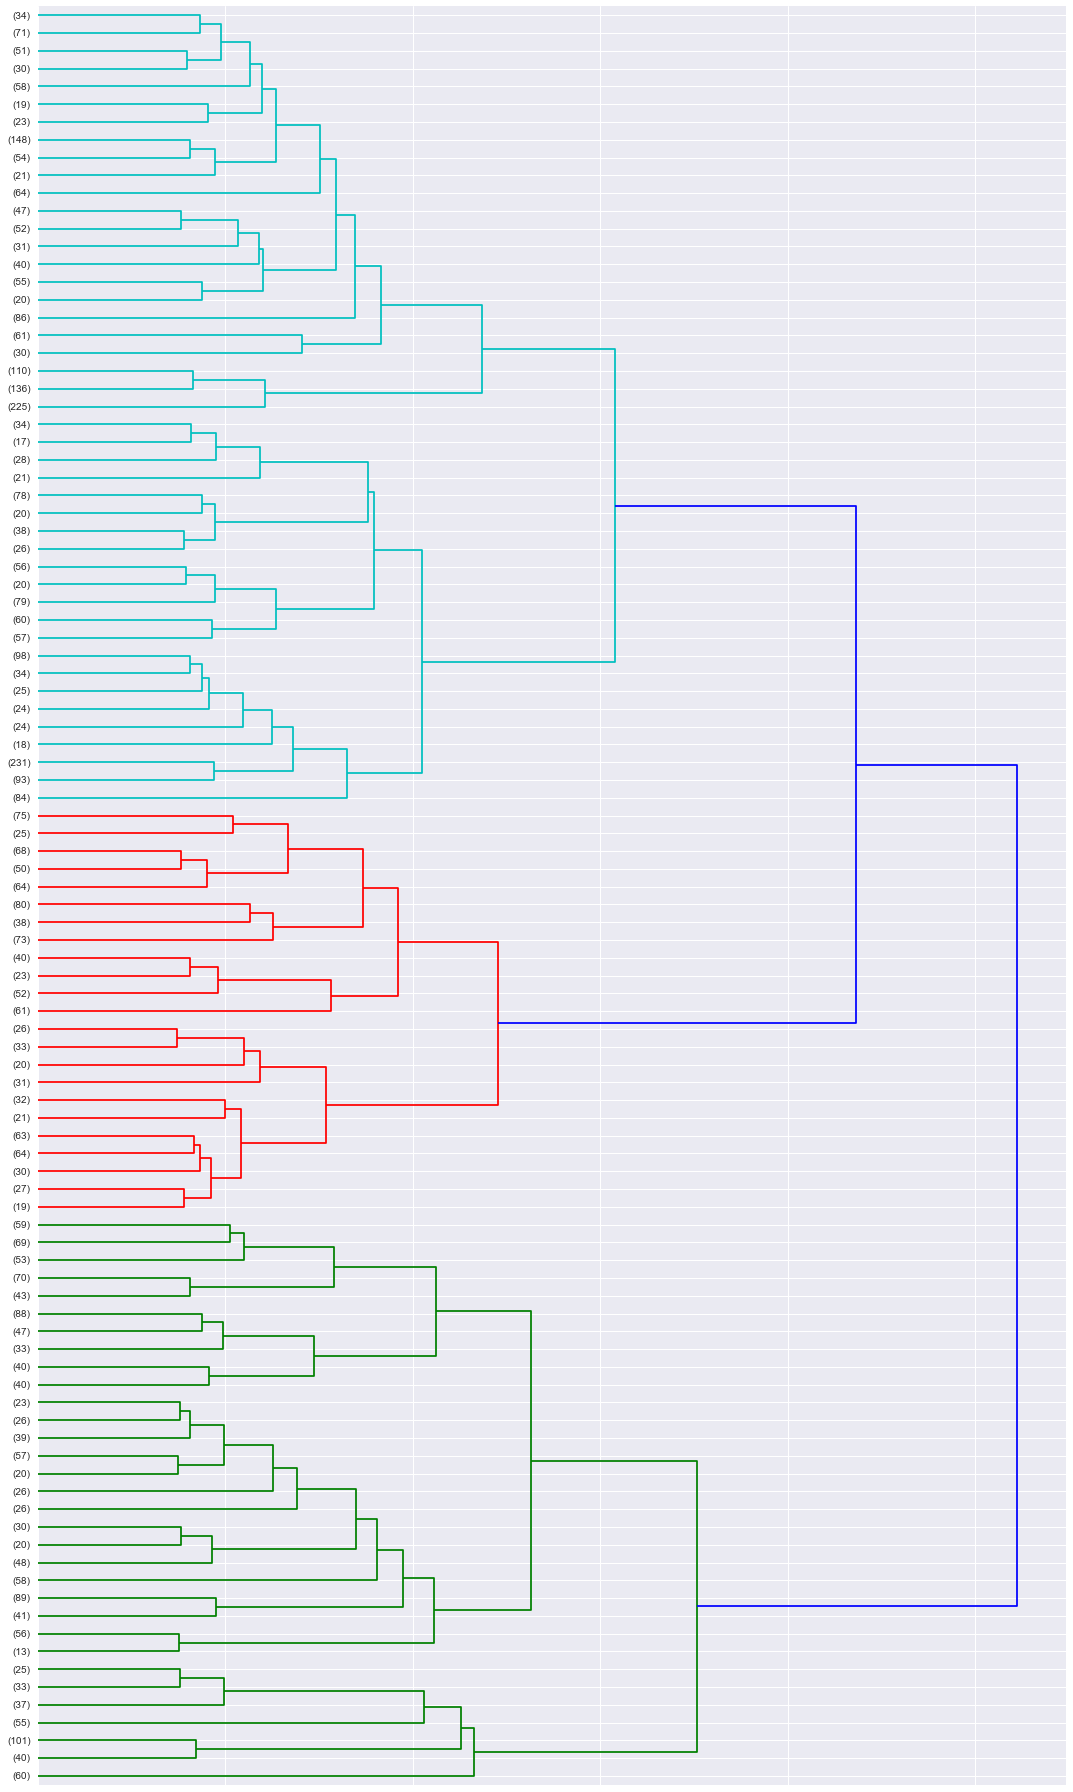

In [80]:
ward_matrix_cos = ward(cosine_sim)

None


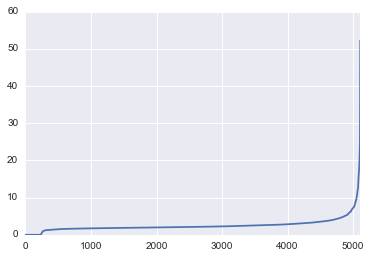

In [81]:
print(ward_plot(ward_matrix_cos))

In [86]:
flatten_clusters(df_neuro, ward_matrix_cos,7, 'distance', 'ward_cos')

,APPLICATION_ID,ACTIVITY,ADMINISTERING_IC,APPLICATION_TYPE,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_START,BUDGET_END,CFDA_CODE,CORE_PROJECT_NUM,...,ABSTRACT_TEXT,abs_neuro_count,wordlist,wordlist_ct,rel_neuro_count,kmeans,ward_cos,ward_euc,budget_months,aff_prop
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
28905,6865624,R01,AA,5,NaN,2005-02-14T00:00:00,03/01/2005,02/28/2006,273.0,R01AA002686,...,[unreadable] DESCRIPTION (provided by applican...,11,"['unread', 'descript', 'provid', 'applic', 'pa...",199,0.055276,9,48,89,12,6
28907,6941698,R01,AA,5,NaN,2005-08-29T00:00:00,09/01/2005,08/31/2006,273.0,R01AA003490,...,DESCRIPTION (provided by applicant): Animal...,17,"['descript', 'provid', 'applic', 'anim', 'mode...",219,0.077626,9,37,37,12,507
28912,6865513,R01,AA,5,NaN,2005-02-15T00:00:00,03/01/2005,02/28/2006,273.0,R01AA005909,...,Our program of research has been designed arou...,4,"['program', 'research', 'design', 'around', 'p...",231,0.017316,32,93,47,12,421
28913,6932081,R01,AA,5,NaN,2005-07-28T00:00:00,08/01/2005,07/31/2006,273.0,R01AA006069,...,DESCRIPTION (provided by applicant): Heavy dri...,20,"['descript', 'provid', 'applic', 'heavi', 'dri...",291,0.068729,26,1,6,12,3
28916,6897827,R01,AA,5,NaN,2005-05-26T00:00:00,06/01/2005,05/31/2006,273.0,R01AA006399,...,DESCRIPTION (provided by applicant): Our view ...,2,"['descript', 'provid', 'applic', 'view', 'acut...",183,0.010929,9,1,55,12,8
28918,6898782,R01,AA,5,NaN,2005-05-26T00:00:00,06/01/2005,05/31/2006,273.0,R01AA006916,...,DESCRIPTION (provided by applicant): The centr...,12,"['descript', 'provid', 'applic', 'central', 'h...",217,0.055300,26,1,55,12,3
28919,6850913,R01,AA,5,NaN,2005-01-25T00:00:00,02/01/2005,01/31/2006,273.0,R01AA007568,...,DESCRIPTION (provided by applicant): Sculpting...,7,"['descript', 'provid', 'applic', 'sculpt', 'de...",199,0.035176,19,37,42,12,647
28927,6923539,R01,AA,2,NaN,2005-05-13T00:00:00,05/15/2005,03/31/2006,273.0,R01AA008003,...,DESCRIPTION (provided by applicant): Tolera...,3,"['descript', 'provid', 'applic', 'toler', 'imp...",152,0.019737,2,17,89,11,475
28932,6850109,R01,AA,5,NaN,2004-11-26T00:00:00,12/01/2004,11/30/2005,273.0,R01AA008459,...,[unreadable] DESCRIPTION (provided by applic...,5,"['unread', 'descript', 'provid', 'applic', 'al...",238,0.021008,26,1,7,12,8


Axes(0.125,0.125;0.775x0.775)


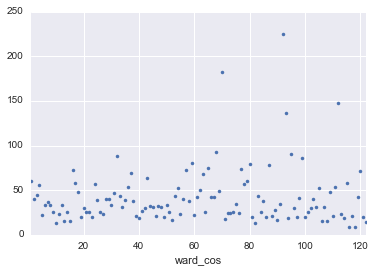

In [87]:
print (df_neuro.groupby('ward_cos')['ABSTRACT_TEXT'].count().plot(ls='', marker='.'))

#### Let's try Ward clustering using Euclidean distances instead.

In [104]:
ward_matrix_euc = ward(euc_dist)

In [105]:
list(ward_matrix_euc)

[array([ 3879.,  3880.,     0.,     2.]),
 array([ 4495.,  4496.,     0.,     2.]),
 array([ 3942.,  3943.,     0.,     2.]),
 array([ 3700.,  3701.,     0.,     2.]),
 array([ 3335.,  3336.,     0.,     2.]),
 array([ 3282.,  3283.,     0.,     2.]),
 array([ 3919.,  3920.,     0.,     2.]),
 array([ 4437.,  4438.,     0.,     2.]),
 array([ 4233.,  4234.,     0.,     2.]),
 array([ 4129.,  4130.,     0.,     2.]),
 array([ 4165.,  4166.,     0.,     2.]),
 array([ 3808.,  3809.,     0.,     2.]),
 array([ 3521.,  3522.,     0.,     2.]),
 array([ 3026.,  3027.,     0.,     2.]),
 array([ 4330.,  4331.,     0.,     2.]),
 array([ 4469.,  4470.,     0.,     2.]),
 array([ 3847.,  3848.,     0.,     2.]),
 array([ 3182.,  3183.,     0.,     2.]),
 array([ 4485.,  4486.,     0.,     2.]),
 array([ 3563.,  3564.,     0.,     2.]),
 array([ 4528.,  4529.,     0.,     2.]),
 array([ 4151.,  4152.,     0.,     2.]),
 array([ 3116.,  3117.,     0.,     2.]),
 array([ 3449.,  3450.,     0.,   

In [ ]:
print(ward_plot(ward_matrix_euc))

In [ ]:
flatten_clusters(df_neuro, ward_matrix_euc, 4, 'distance', 'ward_euc')

In [ ]:
print (df_neuro.groupby('ward_euc')['ABSTRACT_TEXT'].count().plot(ls='', marker='.'))

In [ ]:
list(df_neuro[df_neuro['ward_euc'] == 4]['ABSTRACT_TEXT'])

### Affinity propagation with tf-idf

In [ ]:
def aff_prop(df_neuro, tfidf):
    from sklearn.cluster import AffinityPropagation
    affprop = AffinityPropagation()
    df_neuro['aff_prop'] = list(affprop.fit_predict(tfidf))
    return df_neuro.groupby('aff_prop')['ward_euc'].count().plot(ls='', marker='.')

In [ ]:
aff_prop(df_neuro, tfidf_svd)

# Visualize top *n* categories

In [ ]:
def get_subjects(tfidf, df_neuro, method, top_n):
    """
    input: 
        df_neuro - dataframe
        method: str, ['kmeans', 'ward_cos', 'ward_euc', 'aff_prop']
        top_n: int, how many topic words to return
    """
    total_list = []
    tfidf[method] = df_neuro[method]
    for i in set(list(tfidf[method])):
        new_df = tfidf[tfidf[method] == i]
        top_words = new_df.iloc[:, :-1].sum().sort_values(ascending=False)[:top_n]
        months = df_neuro[df_neuro[method] == i]['budget_months'].sum()
        cost = df_neuro[df_neuro[method] == i]['TOTAL_COST'].sum()
        total_list.append([i, tfidf[tfidf[method]==i][method].count(), cost, months, list(top_words.index)])
    del tfidf[method]
    
    return pd.DataFrame(total_list, columns=['Group', 'Count', 'sum_Cost', 'sum_Months', 'Topic'])

In [ ]:
final_ward_cos = get_subjects(tfidf, df_neuro, 'ward_cos',5)

In [ ]:
final_ward_euc = get_subjects(tfidf, df_neuro, 'ward_euc', 5)

In [ ]:
final_kmeans = get_subjects(tfidf, df_neuro, 'kmeans', 5)

In [ ]:
final_aff_prop = get_subjects(tfidf, df_neuro, 'aff_prop', 5)

In [ ]:
final_aff_prop.sort_values('Count', ascending=False).head(15)

In [ ]:
final_ward_cos.sort_values('Count', ascending=False).head(15)

In [ ]:
final_kmeans.sort_values('Count', ascending=False).head(15)

In [ ]:
final_ward_euc.sort_values('Count', ascending=False).head(15)

Just by looking at these lists and figuring out what terms are over or underrepresented, I can tell you that k-means and affinity propagation were not great methods for this clustering. That leaves hierarchical clustering using either cosine distance matrix or using Euclidean distance (which was what I expected). But, I think Ward agglomerative clustering using Euclidean distance is best in terms of subject. Neuron and cell and brain aren't as overrepresented as in Ward with cosine distance matrix.

# Visualize

Average project length in months, by cluster

In [38]:
finals = [final_ward_cos, final_ward_euc, final_kmeans, final_aff_prop]

In [39]:
def proj_length(df):
    """
    input: one of the "final" dfs
    """
    from scipy.stats import pearsonr
    
    figure = pyplot.figure()
    print (pearsonr(df.sum_Months, df.Count)[0])
    (df.sum_Months/df.Count).plot(color='darkgreen', ls='', marker='o', alpha=0.4) 

0.978593597427
0.9894026613
0.999337910111
0.997972442215


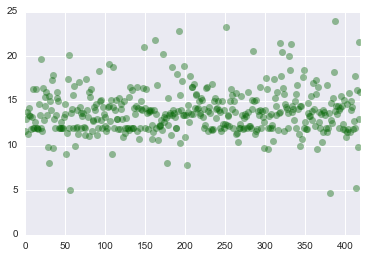

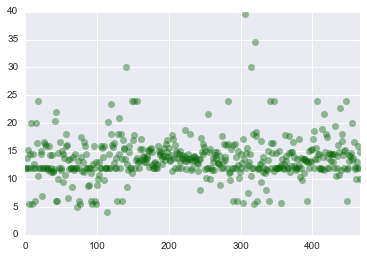

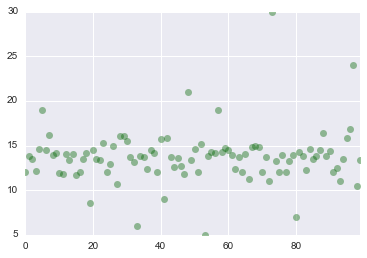

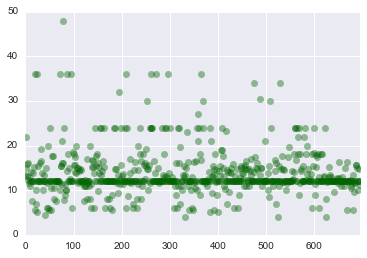

In [40]:
for i in finals:
    proj_length(i)

# Save data for time series
- df_neuro
- final_ward_euc
- final_ward_cos

### Latent Dirichlet Allocation
http://brandonrose.org/clustering#Tf-idf-and-document-similarity

In [41]:
%whos

Variable           Type            Data/Info
--------------------------------------------
TfidfVectorizer    type            <class 'sklearn.feature_e<...>on.text.TfidfVectorizer'>
aff_prop           function        <function aff_prop at 0x115b45730>
clean_cos          function        <function clean_cos at 0x18b728ea0>
clean_df           function        <function clean_df at 0x18b728e18>
convert_datetime   function        <function convert_datetime at 0x115b45158>
cosine_sim         DataFrame                           0    <...>5111 rows x 5111 columns]
days               function        <function days at 0x116c8b950>
df_neuro           DataFrame                   APPLICATION_I<...>n[5111 rows x 52 columns]
euc_dist           ndarray         5111x5111: 26122321 elems, type `float64`, 208978568 bytes (199.29749298095703 Mb)
euc_dist_matrix    function        <function euc_dist_matrix at 0x116c608c8>
final_aff_prop     DataFrame            Group  Count    sum_<...>n\n[697 rows x 5 colum